In [1]:
# 합성곱 신경망의 구성 요소

In [2]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')

In [3]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

In [4]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

In [5]:
keras.layers.MaxPooling2D(2)

In [6]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

In [7]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
# 합성곱 신경망 만들기

In [9]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding = 'same', input_shape=(28, 28, 1)))

In [10]:
model.add(keras.layers.MaxPooling2D(2))

In [11]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [12]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

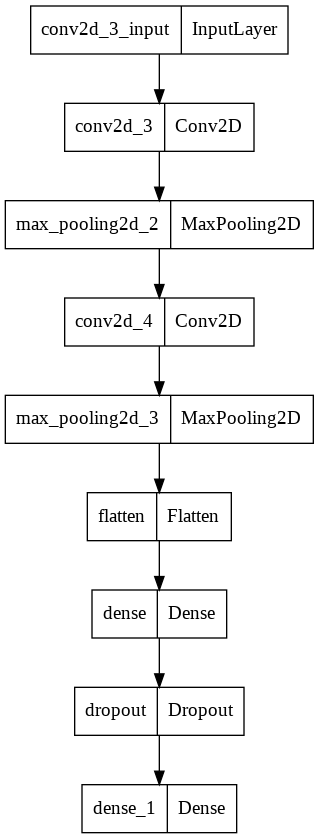

In [14]:
keras.utils.plot_model(model)

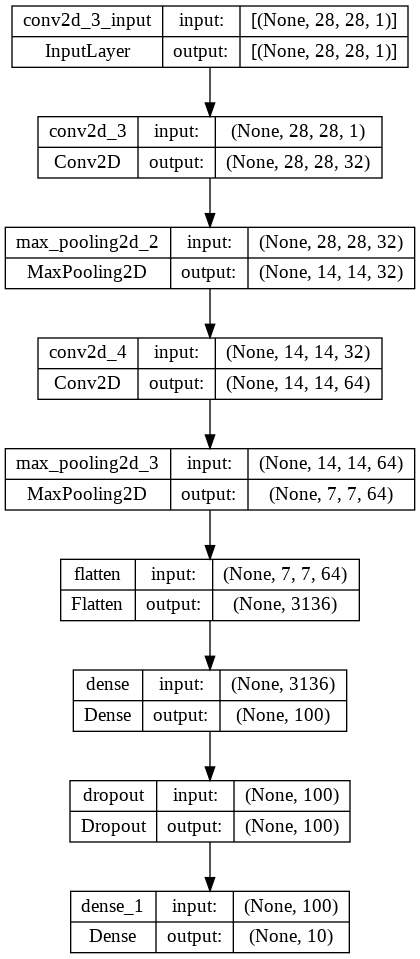

In [15]:
keras.utils.plot_model(model, show_shapes=True)

In [16]:
# 모델 컴파일과 훈련

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 16s 4ms/step - loss: 0.5290 - accuracy: 0.8087 - val_loss: 0.3327 - val_accuracy: 0.8767
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3539 - accuracy: 0.8741 - val_loss: 0.2826 - val_accuracy: 0.8929
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3014 - accuracy: 0.8897 - val_loss: 0.2560 - val_accuracy: 0.9055
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2669 - accuracy: 0.9017 - val_loss: 0.2480 - val_accuracy: 0.9087
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2462 - accuracy: 0.9100 - val_loss: 0.2305 - val_accuracy: 0.9144
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2277 - accuracy: 0.9168 - val_loss: 0.2344 - val_accuracy: 0.9153
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2081 - accuracy: 0.9222 - val_loss: 0.2302 - val_accuracy

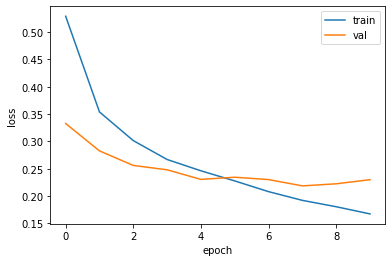

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2186 - accuracy: 0.9218


[0.21857307851314545, 0.921833336353302]

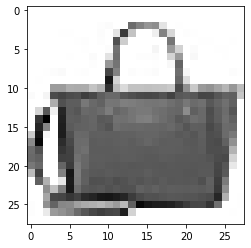

In [20]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [21]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 126ms/step
[[3.9176102e-16 3.4777080e-20 1.3753554e-19 9.3703966e-17 6.1470053e-20
  3.5339062e-18 2.0088801e-17 1.6691353e-16 1.0000000e+00 6.4060351e-19]]


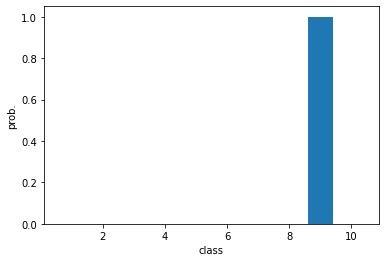

In [22]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [23]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [24]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [25]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [26]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2354 - accuracy: 0.9178


[0.23539038002490997, 0.9178000092506409]

In [27]:
# 가중치 시각화

In [28]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [29]:
model.layers

In [30]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [31]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.01838195 0.24237734


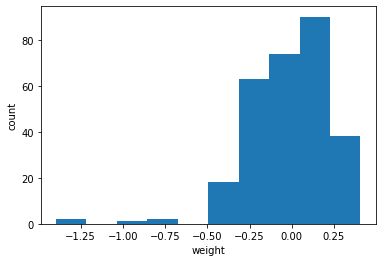

In [32]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

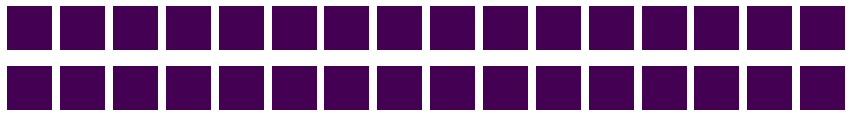

In [33]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [34]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation = \
                                          'relu', padding = 'same', input_shape=(28, 28, 1)))

In [35]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [36]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.010585163 0.081885085


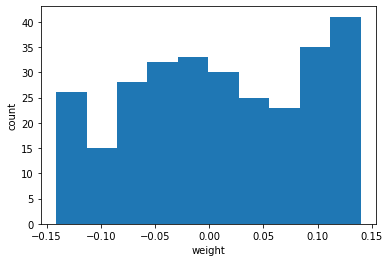

In [37]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

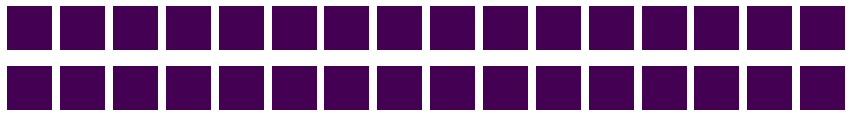

In [38]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=-0.5)
    axs[i, j].axis('off')
plt.show()

In [39]:
# 함수형 API

In [40]:
#dense1 = keras.layers.Dense(100, activation = 'sigmoid')
#dense2 = keras.layers.Dense(10, activation='softmax')

In [41]:
#inputs = keras.Input(shape=(784,))

In [42]:
#hidden = dense1(inputs)

In [43]:
#outputs = dense2(hidden)

In [44]:
#model = keras.Model(inputs, outputs)

In [45]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_3_input'), name='conv2d_3_input', description="created by layer 'conv2d_3_input'")


In [46]:
conv_acti = keras.Model(model.input, model.layers[0].output)

In [47]:
# 특성 맵 시각화

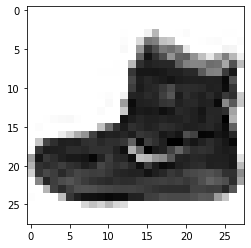

In [48]:
(train_input, train_target), (test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [49]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 33ms/step


In [50]:
print(feature_maps.shape)

(1, 28, 28, 32)


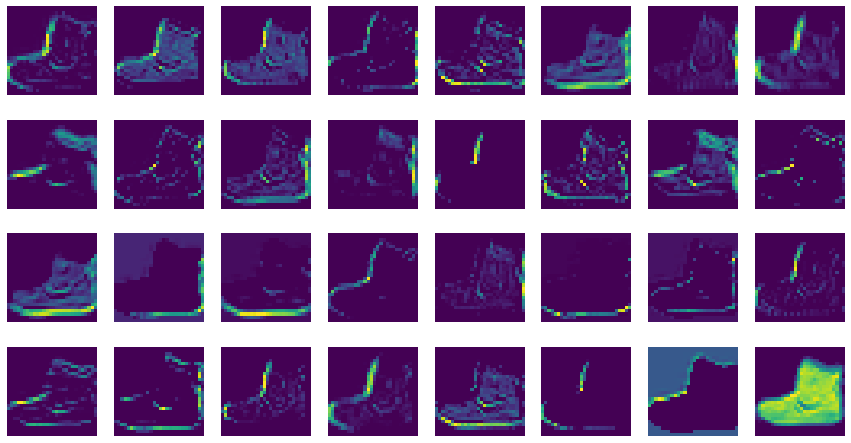

In [51]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [52]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [53]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 54ms/step


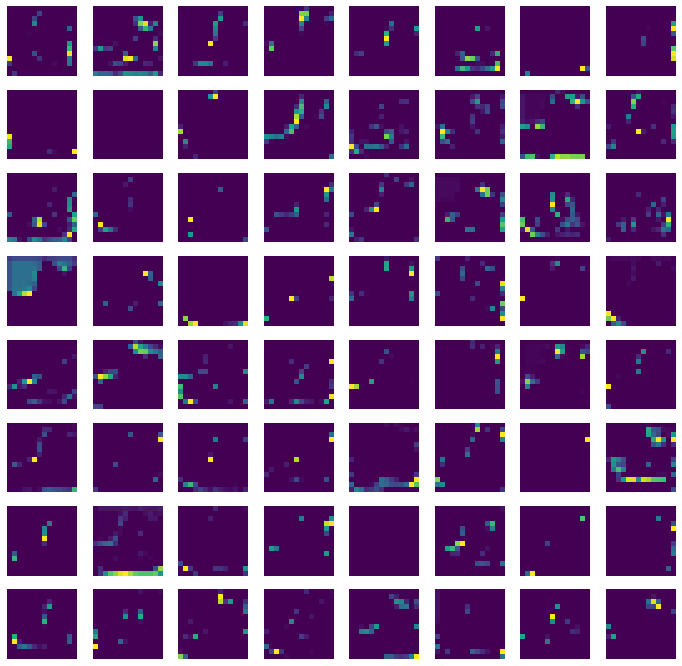

In [54]:
fig, axs = plt.subplots(8, 8, figsize = (12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()